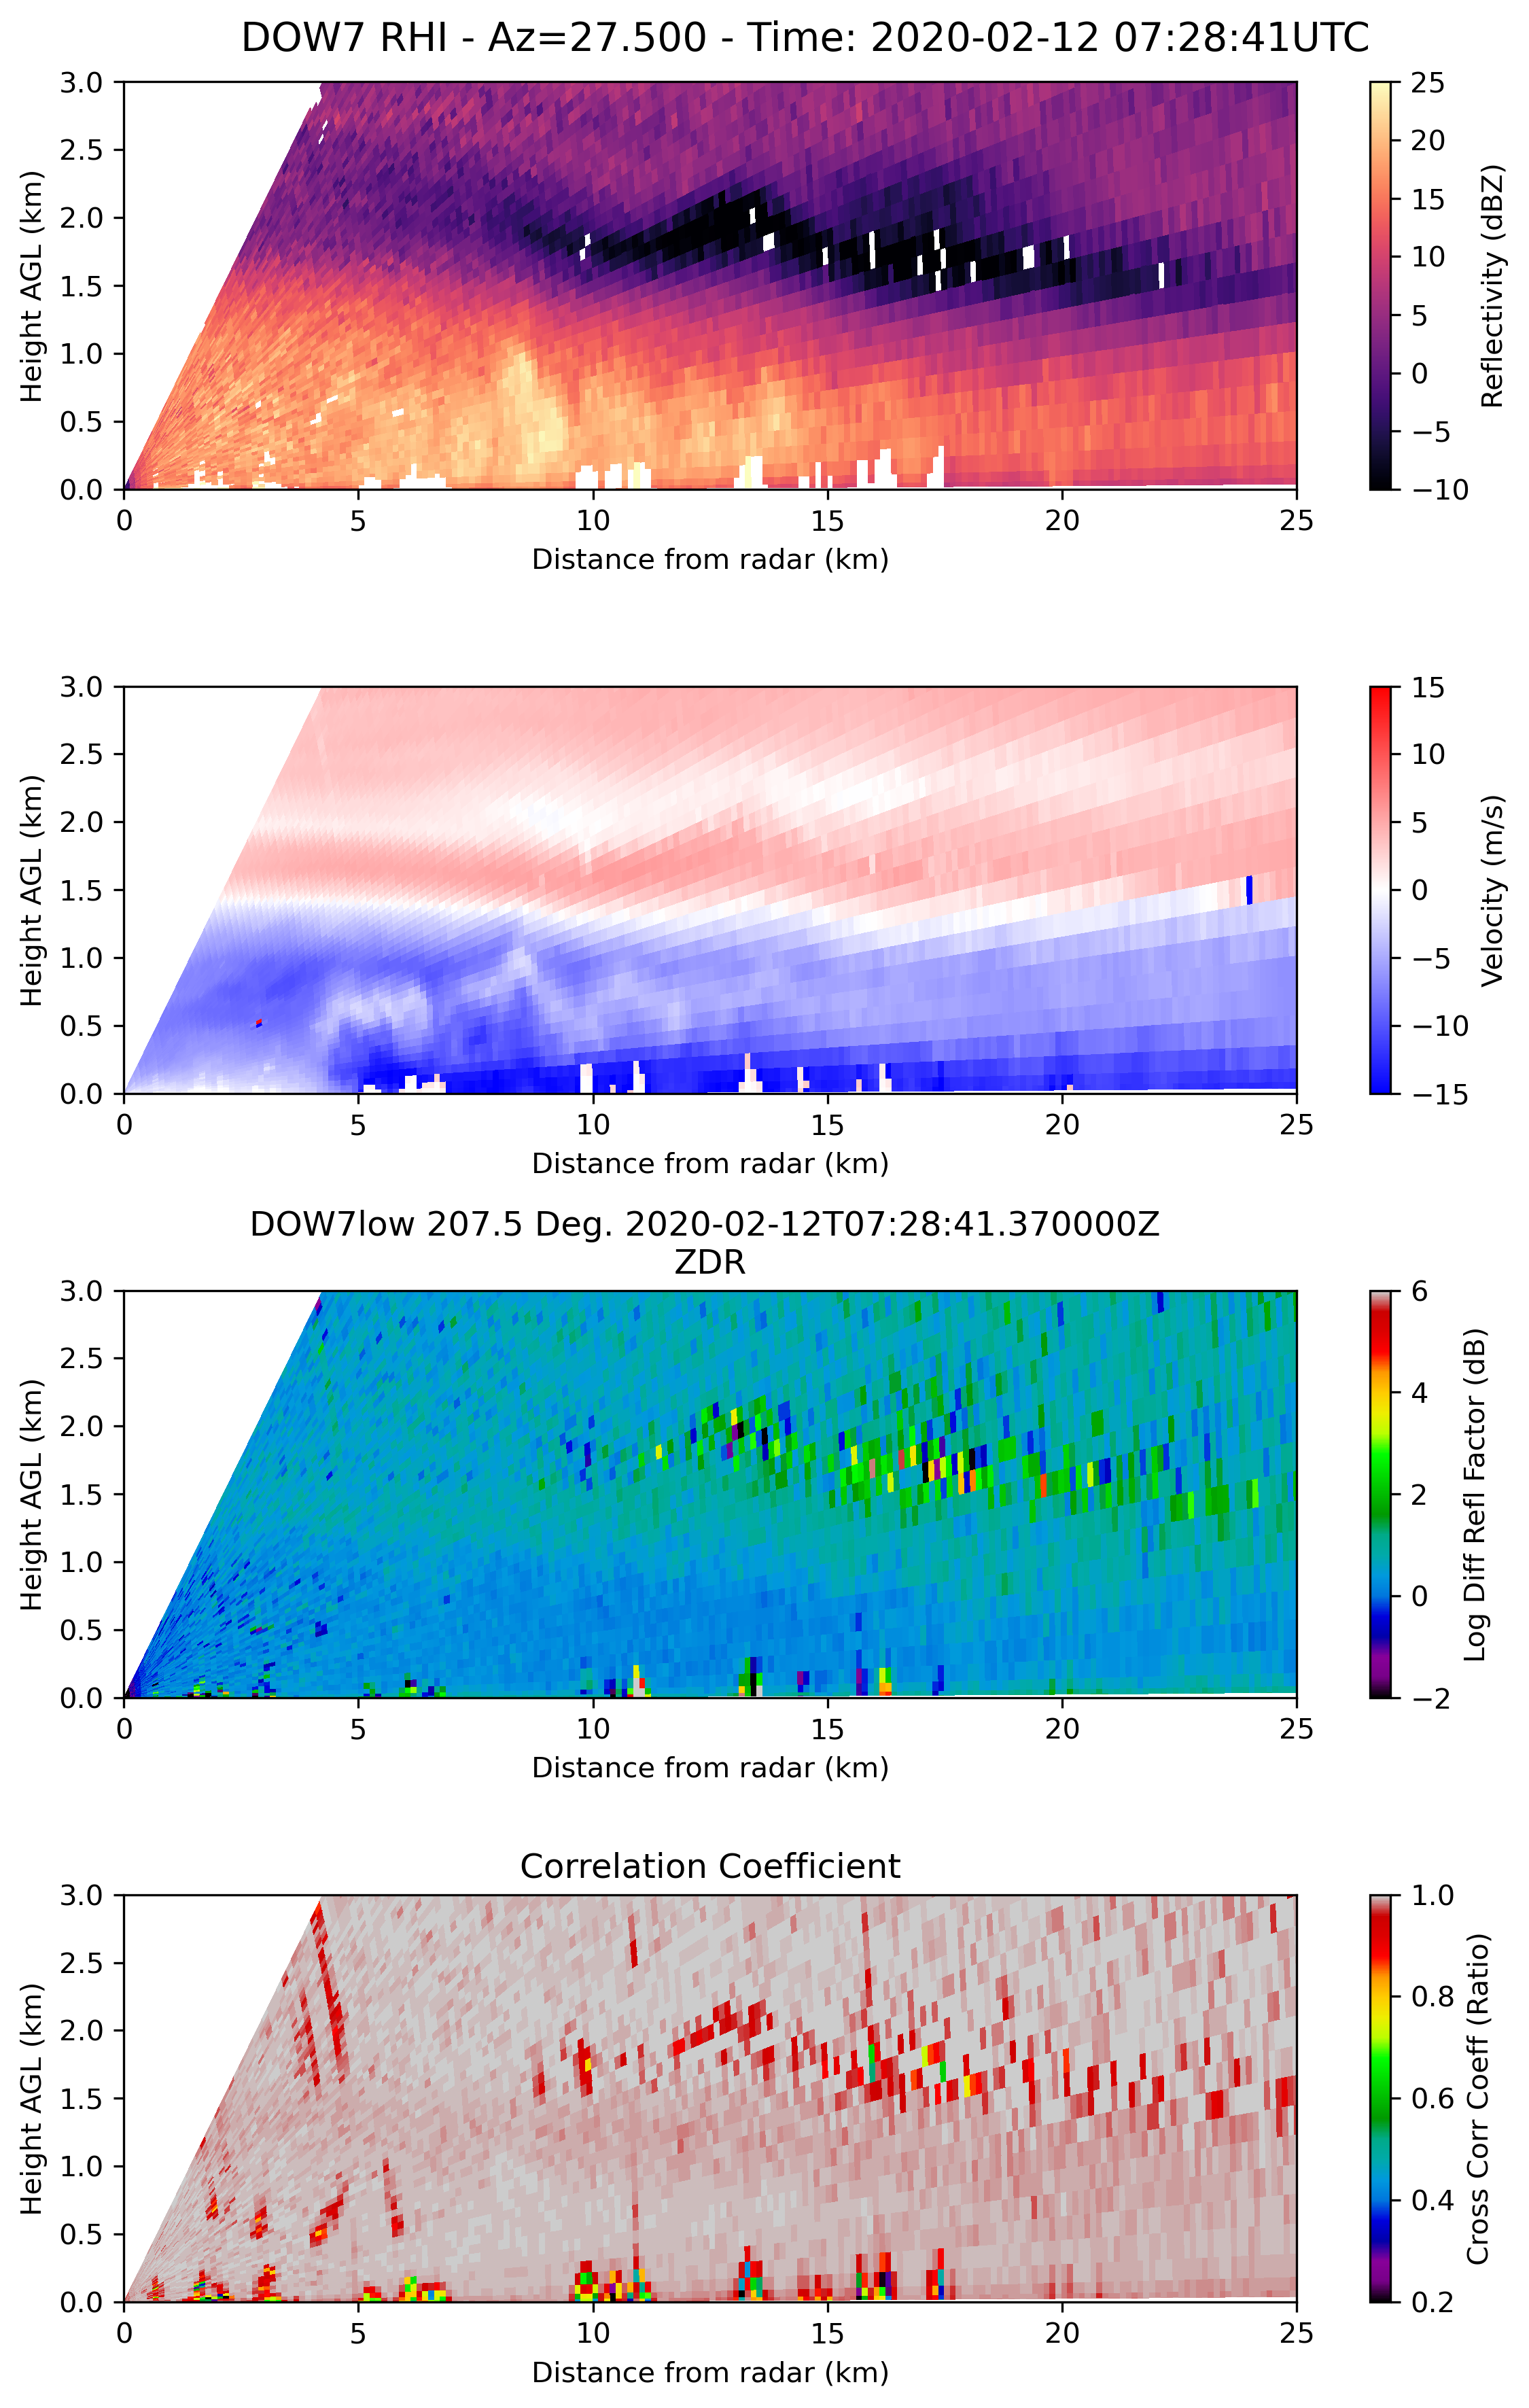

In [40]:
# Program to plot DOW RHIs of the frontal passage on 12 February 2020
# Originally created by Alec Sczepanski, edited by Aaron Kennedy
# Last edit on 19 Feb 2021
import matplotlib.pyplot as plt
import pyart
import netCDF4
import os

import warnings
warnings.filterwarnings('ignore')
# Read in files

path = 'C:/GitHub/BAMS_2021/data/RHI/'
files = os.listdir(path)

radar = pyart.io.read_cfradial(path+files[3])
radar.metadata['instrument_name'] = 'DOW7low'
display = pyart.graph.RadarDisplay(radar)
gatefilter = pyart.correct.GateFilter(radar)
gatefilter.exclude_below('RHOHV', 0.95, exclude_masked = True)

fig = plt.figure(figsize = [8,12],dpi=300,facecolor='white')

xlabel = 'Distance from radar (km)'
ylabel = 'Height AGL (km)'

fixed_angle = (radar.fixed_angle['data'][0] - 180.) % 360.
time_start = netCDF4.num2date(radar.time['data'][0], radar.time['units'])
time = time_start.strftime('%Y-%m-%d %H:%M:%SUTC')

ax1 = fig.add_subplot(411)
display.plot('DBZHC', 0, 
            vmin = -10, 
            vmax = 25,
            title_flag = 0,
            mask_outside = False,
            axislabels = (xlabel, ylabel),
            colorbar_label = 'Reflectivity (dBZ)',
            cmap = 'magma',
            gatefilter = gatefilter,
            ax=ax1)

display.set_limits (xlim = [0,25], ylim = [0,3], ax = ax1)

ax2 = fig.add_subplot(412)
display.plot('VEL', 0, 
            vmin = -15, 
            vmax = 15,
            title_flag = 0,
            mask_outside = False, 
            colorbar_label = 'Velocity (m/s)',
            axislabels = (xlabel, ylabel),
            cmap = 'bwr',
            ax=ax2)

display.set_limits (xlim = [0,25], ylim = [0,3], ax = ax2)

ax3 = fig.add_subplot(413)
display.plot('ZDR', 0, 
            vmin = -2, 
            vmax = 6,
            mask_outside = False,
            axislabels = (xlabel, ylabel),
            colorbar_label = 'Log Diff Refl Factor (dB)', 
            cmap = 'nipy_spectral',
            ax=ax3)

display.set_limits (xlim = [0,25], ylim = [0,3], ax = ax3)
#    display.set_limits (xlim = [0,15], ylim = [0,0.75], ax = ax3)

ax4 = fig.add_subplot(414)
display.plot('RHOHV', 0, 
            vmin = 0.2, 
            vmax = 1,
            mask_outside = False, 
            title = 'Correlation Coefficient',
            axislabels = (xlabel, ylabel),
            colorbar_label = 'Cross Corr Coeff (Ratio)', 
            cmap = 'nipy_spectral',
            ax=ax4)

display.set_limits (xlim = [0,25], ylim = [0,3], ax = ax4)

figure_title = 'DOW7 RHI - Az=%.3f' % (fixed_angle) + ' - Time: ' + time 
fig.suptitle(figure_title, fontsize = 14)
plt.tight_layout()

#plt.savefig('BAMS_3_panel_radar_0840UTC.png',bbox_inches='tight')
plt.show()



In [4]:
files

['cfrad.20200212_072750.947_to_20200212_072804.698_DOW7low_RHI.nc',
 'cfrad.20200212_072804.828_to_20200212_072822.874_DOW7low_RHI.nc',
 'cfrad.20200212_072823.004_to_20200212_072841.198_DOW7low_RHI.nc',
 'cfrad.20200212_072841.370_to_20200212_072900.242_DOW7low_RHI.nc',
 'cfrad.20200212_072900.372_to_20200212_072918.346_DOW7low_RHI.nc',
 'cfrad.20200212_072918.600_to_20200212_072938.098_DOW7low_RHI.nc',
 'cfrad.20200212_072938.245_to_20200212_072957.628_DOW7low_RHI.nc',
 'cfrad.20200212_072957.758_to_20200212_073015.600_DOW7low_RHI.nc']